In [153]:
#import pacakges
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#set dataframe

df = pd.read_csv (r'C:\Users\shnta\Desktop\movies.csv')
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [154]:
#add in income percentile 
df['Incomepercent'] = df['gross']/df['budget']*100
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Incomepercent
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,653.592675
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1168.939483
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1198.670673
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,460.325665
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,206.273478


In [156]:
#show list of columns names
header = list(df.columns)
header

['budget',
 'company',
 'country',
 'director',
 'genre',
 'gross',
 'name',
 'rating',
 'released',
 'runtime',
 'score',
 'star',
 'votes',
 'writer',
 'year',
 'Incomepercent']

In [157]:
#reorder columns to make more sense 
df = df[['budget','gross','Incomepercent','name','company','released','year','director','star','writer','genre','rating','score','votes','runtime','country']]
df.head(10)

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
0,8000000.0,52287414.0,653.592675,Stand by Me,Columbia Pictures Corporation,1986-08-22,1986,Rob Reiner,Wil Wheaton,Stephen King,Adventure,R,8.1,299174,89,USA
1,6000000.0,70136369.0,1168.939483,Ferris Bueller's Day Off,Paramount Pictures,1986-06-11,1986,John Hughes,Matthew Broderick,John Hughes,Comedy,PG-13,7.8,264740,103,USA
2,15000000.0,179800601.0,1198.670673,Top Gun,Paramount Pictures,1986-05-16,1986,Tony Scott,Tom Cruise,Jim Cash,Action,PG,6.9,236909,110,USA
3,18500000.0,85160248.0,460.325665,Aliens,Twentieth Century Fox Film Corporation,1986-07-18,1986,James Cameron,Sigourney Weaver,James Cameron,Action,R,8.4,540152,137,USA
4,9000000.0,18564613.0,206.273478,Flight of the Navigator,Walt Disney Pictures,1986-08-01,1986,Randal Kleiser,Joey Cramer,Mark H. Baker,Adventure,PG,6.9,36636,90,USA
5,6000000.0,138530565.0,2308.842750,Platoon,Hemdale,1987-02-06,1986,Oliver Stone,Charlie Sheen,Oliver Stone,Drama,R,8.1,317585,120,UK
6,25000000.0,12729917.0,50.919668,Labyrinth,Henson Associates (HA),1986-06-27,1986,Jim Henson,David Bowie,Dennis Lee,Adventure,PG,7.4,102879,101,UK
7,6000000.0,8551228.0,142.520467,Blue Velvet,De Laurentiis Entertainment Group (DEG),1986-10-23,1986,David Lynch,Isabella Rossellini,David Lynch,Drama,R,7.8,146768,120,USA
8,9000000.0,40471663.0,449.685144,Pretty in Pink,Paramount Pictures,1986-02-28,1986,Howard Deutch,Molly Ringwald,John Hughes,Comedy,PG-13,6.8,60565,96,USA
9,15000000.0,40456565.0,269.710433,The Fly,SLM Production Group,1986-08-15,1986,David Cronenberg,Jeff Goldblum,George Langelaan,Drama,R,7.5,129698,96,USA


In [158]:
#cleaning up data
df.dtypes  

budget           float64
gross            float64
Incomepercent    float64
name              object
company           object
                  ...   
rating            object
score            float64
votes              int64
runtime            int64
country           object
Length: 16, dtype: object

In [159]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
6380,245000000.0,936662225.0,382.311112,Star Wars: The Force Awakens,Lucasfilm,2015-12-18,2015,J.J. Abrams,Daisy Ridley,Lawrence Kasdan,Action,PG-13,8.1,687192,136,USA
5061,237000000.0,760507625.0,320.889293,Avatar,Twentieth Century Fox Film Corporation,2009-12-18,2009,James Cameron,Sam Worthington,James Cameron,Action,PG-13,7.8,954412,162,UK
2420,200000000.0,658672302.0,329.336151,Titanic,Twentieth Century Fox Film Corporation,1997-12-19,1997,James Cameron,Leonardo DiCaprio,James Cameron,Drama,PG-13,7.8,862554,194,USA
6391,150000000.0,652270625.0,434.847083,Jurassic World,Universal Pictures,2015-06-12,2015,Colin Trevorrow,Chris Pratt,Rick Jaffa,Action,PG-13,7.0,469200,124,USA
5723,220000000.0,623357910.0,283.344505,The Avengers,Marvel Studios,2012-05-04,2012,Joss Whedon,Robert Downey Jr.,Joss Whedon,Action,PG-13,8.1,1064633,143,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0.0,547.0,inf,Into the White,Zentropa International Norway,2013-04-12,2012,Petter N�ss,Florian Lukas,Ole Meldgaard,Action,R,7.2,16609,104,Norway
5699,0.0,542.0,inf,The Decoy Bride,Isle of Man Film,2012-03-09,2011,Sheree Folkson,Kelly Macdonald,Neil Jaworski,Comedy,PG,6.2,9018,89,UK
6066,0.0,441.0,inf,I Spit on Your Grave 2,Cinetel Films,2014-01-19,2013,Steven R. Monroe,Jemma Dallender,Neil Elman,Crime,R,5.7,21070,106,USA
2594,15000000.0,309.0,0.002060,Trojan War,Daybreak,1997-10-01,1997,George Huang,Will Friedle,Andy Burg,Comedy,PG-13,5.7,5034,84,USA


In [183]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
0,8000000,52287414,653.592675,4661,665,39,1986,2192,2454,3716,1,8,8.1,299174,89,54
1,6000000,70136369,1168.939483,1821,1680,27,1986,1296,1605,1970,4,7,7.8,264740,103,54
2,15000000,179800601,1198.670673,6203,1680,23,1986,2645,2345,1852,0,6,6.9,236909,110,54
3,18500000,85160248,460.325665,295,2062,33,1986,1066,2192,1629,0,8,8.4,540152,137,54
4,9000000,18564613,206.273478,1872,2122,36,1986,2123,1139,2549,1,6,6.9,36636,90,54


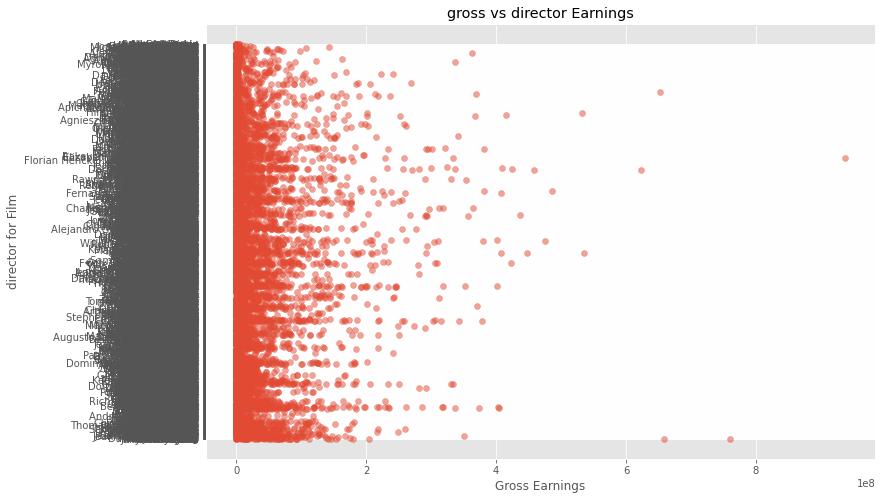

In [162]:
#building correlations
#gross vs director beacuse i think the director is the most important indicator if the movie will have a high grossing amount
#didnt work becuase director is a string. it looks dirty


plt.scatter(x=df['gross'], y=df['director'], alpha=0.5)
plt.title('gross vs director Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('director for Film')
plt.show()

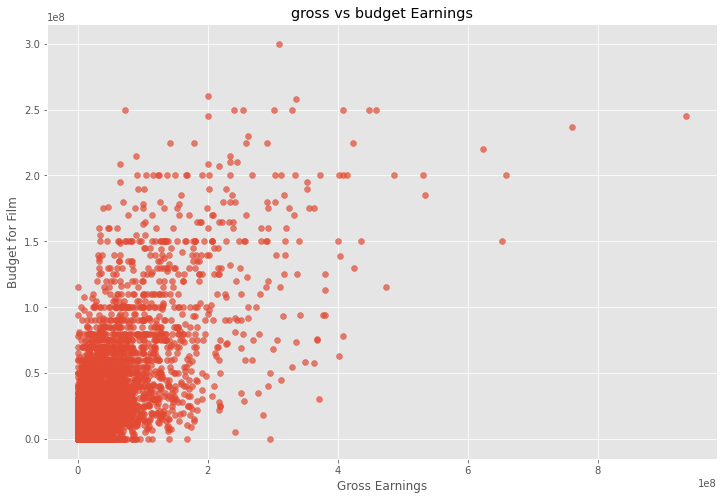

In [180]:
#change y axis to something else
plt.scatter(x=df['gross'], y=df['budget'], alpha=0.7)
plt.title('gross vs budget Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [184]:
df.sort_values(by = ['gross'],ascending = False).head()

,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
6380,245000000,936662225,382.311112,4679,1428,2290,2015,1037,475,2356,0,7,8.1,687192,136,54
5061,237000000,760507625,320.889293,501,2062,1800,2009,1066,2084,1629,0,7,7.8,954412,162,53
2420,200000000,658672302,329.336151,6177,2062,910,1997,1066,1444,1629,6,7,7.8,862554,194,54
6391,150000000,652270625,434.847083,2721,2085,2247,2015,466,404,3310,0,7,7.0,469200,124,54
5723,220000000,623357910,283.344505,4995,1491,1987,2012,1412,2001,2145,0,7,8.1,1064633,143,54


<AxesSubplot:xlabel='gross', ylabel='budget'>

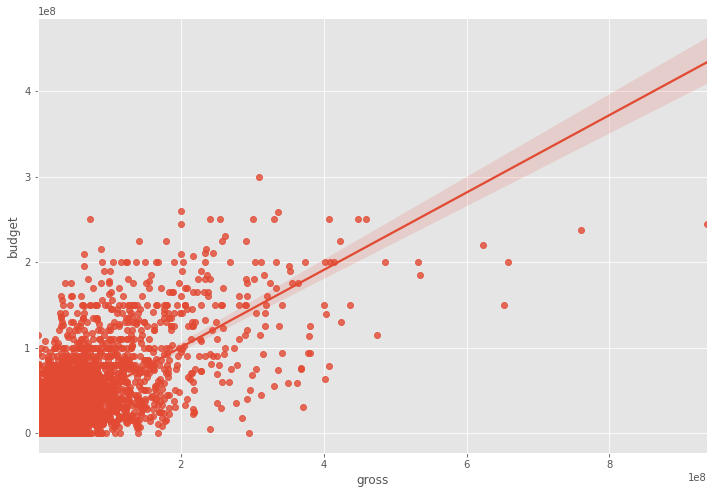

In [170]:
#using seaborn for line

sns.regplot(x='gross', y='budget', data=df

<AxesSubplot:xlabel='gross', ylabel='budget'>

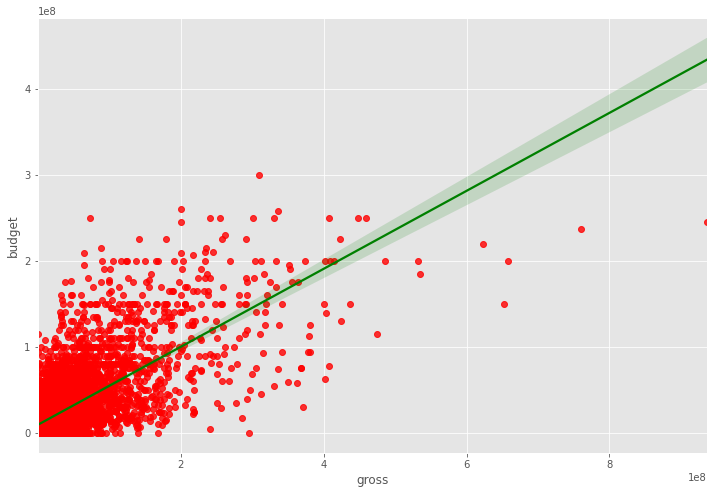

In [177]:
sns.regplot(x='gross', y='budget', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [178]:
df.corr()

,budget,gross,Incomepercent,year,score,votes,runtime
budget,1.000000,0.712196,-0.023540,0.291009,0.042145,0.503924,0.268226
gross,0.712196,1.000000,0.023437,0.191548,0.165693,0.662457,0.224579
Incomepercent,-0.023540,0.023437,1.000000,0.002759,0.003194,0.015162,-0.028540
year,0.291009,0.191548,0.002759,1.000000,0.105276,0.229304,0.087639
score,0.042145,0.165693,0.003194,0.105276,1.000000,0.393607,0.395343
votes,0.503924,0.662457,0.015162,0.229304,0.393607,1.000000,0.317399
runtime,0.268226,0.224579,-0.028540,0.087639,0.395343,0.317399,1.000000


In [185]:
#assigning random numbers to each unique value to get correlation values

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()


,budget,gross,Incomepercent,name,company,released,year,director,star,writer,genre,rating,score,votes,runtime,country
0,8000000,52287414,653.592675,4661,665,39,1986,2192,2454,3716,1,8,8.1,299174,89,54
1,6000000,70136369,1168.939483,1821,1680,27,1986,1296,1605,1970,4,7,7.8,264740,103,54
2,15000000,179800601,1198.670673,6203,1680,23,1986,2645,2345,1852,0,6,6.9,236909,110,54
3,18500000,85160248,460.325665,295,2062,33,1986,1066,2192,1629,0,8,8.4,540152,137,54
4,9000000,18564613,206.273478,1872,2122,36,1986,2123,1139,2549,1,6,6.9,36636,90,54


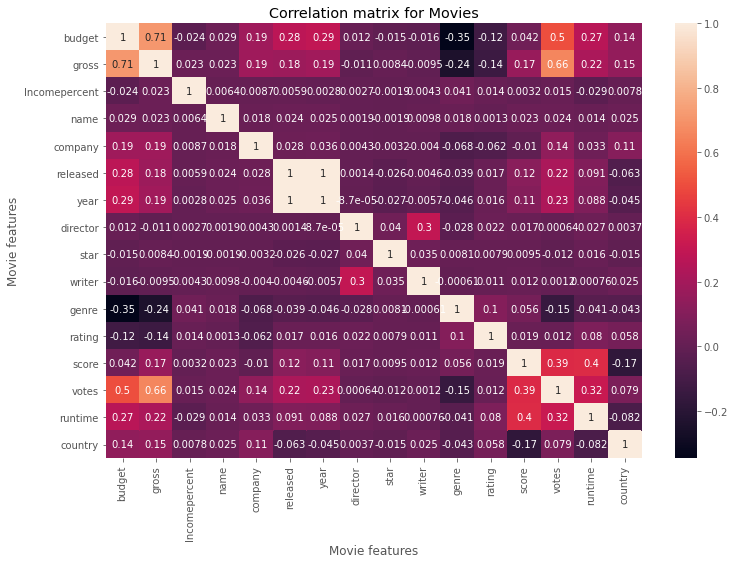

In [182]:
#correlation matrix creation the lighter the color the more correlation it has. 
# only correlation to having a higher gross earning is budget and votes. one of which is an arbitrary indicator
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()